# IMPORTING LIBRARIES AND READING DATA

* Some libraries are imported below.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter (action = 'ignore')

* The “warnings” module in Python prevents warnings in the output of the program from being seen on the console
* “simplefilter” function applies the specified warning type to the specified action (where warning type: 'ignore', action: 'action')

In [52]:
# saves data in df DataFrame
df = pd.read_csv("/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv", nrows=50000)

In [53]:
# Calls the first 5 lines of the DataFrame
df.head()  

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [54]:
# df accesses the basic information of the DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                50000 non-null  object 
 1   Checkup                       50000 non-null  object 
 2   Exercise                      50000 non-null  object 
 3   Heart_Disease                 50000 non-null  object 
 4   Skin_Cancer                   50000 non-null  object 
 5   Other_Cancer                  50000 non-null  object 
 6   Depression                    50000 non-null  object 
 7   Diabetes                      50000 non-null  object 
 8   Arthritis                     50000 non-null  object 
 9   Sex                           50000 non-null  object 
 10  Age_Category                  50000 non-null  object 
 11  Height_(cm)                   50000 non-null  float64
 12  Weight_(kg)                   50000 non-null  float64
 13  B

# EXPLORATORY DATA ANALYSİS

In [55]:
# gives you the dimensions of a DataFrame. 
df.shape 

(50000, 19)

In [56]:
#check for null values
df.isnull().sum() 

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

* isnull(): Checks if each cell in the DataFrame is missing.
* .sum(): Sums true values

In [57]:
# Used to see the distribution of missing values in the data set.
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Height_(cm),50000.0,170.302580,10.764121,91.00,163.00,170.00,178.00,234.00
Weight_(kg),50000.0,81.888519,20.651591,25.40,68.04,79.38,92.99,272.16
BMI,50000.0,28.154736,6.361491,12.16,23.78,27.12,31.19,98.44
Alcohol_Consumption,50000.0,5.311120,8.380039,0.00,0.00,1.00,7.00,30.00
Fruit_Consumption,50000.0,30.486840,25.326719,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,50000.0,16.017800,15.628798,0.00,4.00,12.00,24.00,120.00
FriedPotato_Consumption,50000.0,5.949200,8.480237,0.00,1.00,4.00,8.00,120.00


In [58]:
#check duplicate values
df.duplicated().sum() 

2

In [59]:
#drop the duplicated values
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Fair,Within the past year,No,No,No,No,No,No,No,Female,30-34,152.0,149.69,64.45,Yes,0.0,16.0,30.0,4.0
49996,Good,Within the past 2 years,Yes,No,No,No,No,No,No,Male,18-24,168.0,92.99,33.09,No,0.0,1.0,4.0,3.0
49997,Good,Within the past year,Yes,No,No,No,No,No,No,Female,25-29,150.0,63.50,28.28,No,28.0,4.0,14.0,14.0
49998,Very Good,Within the past year,Yes,No,Yes,No,No,No,Yes,Female,60-64,160.0,59.87,23.38,No,5.0,60.0,60.0,0.0


In [60]:
#Checking the number of unique values
df.select_dtypes(include='object').nunique() 

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

# FINDING CORRELATION BETWEEN DATA CHARACTERISTICS

In [61]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now, df_encoded contains the label-encoded categorical columns
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


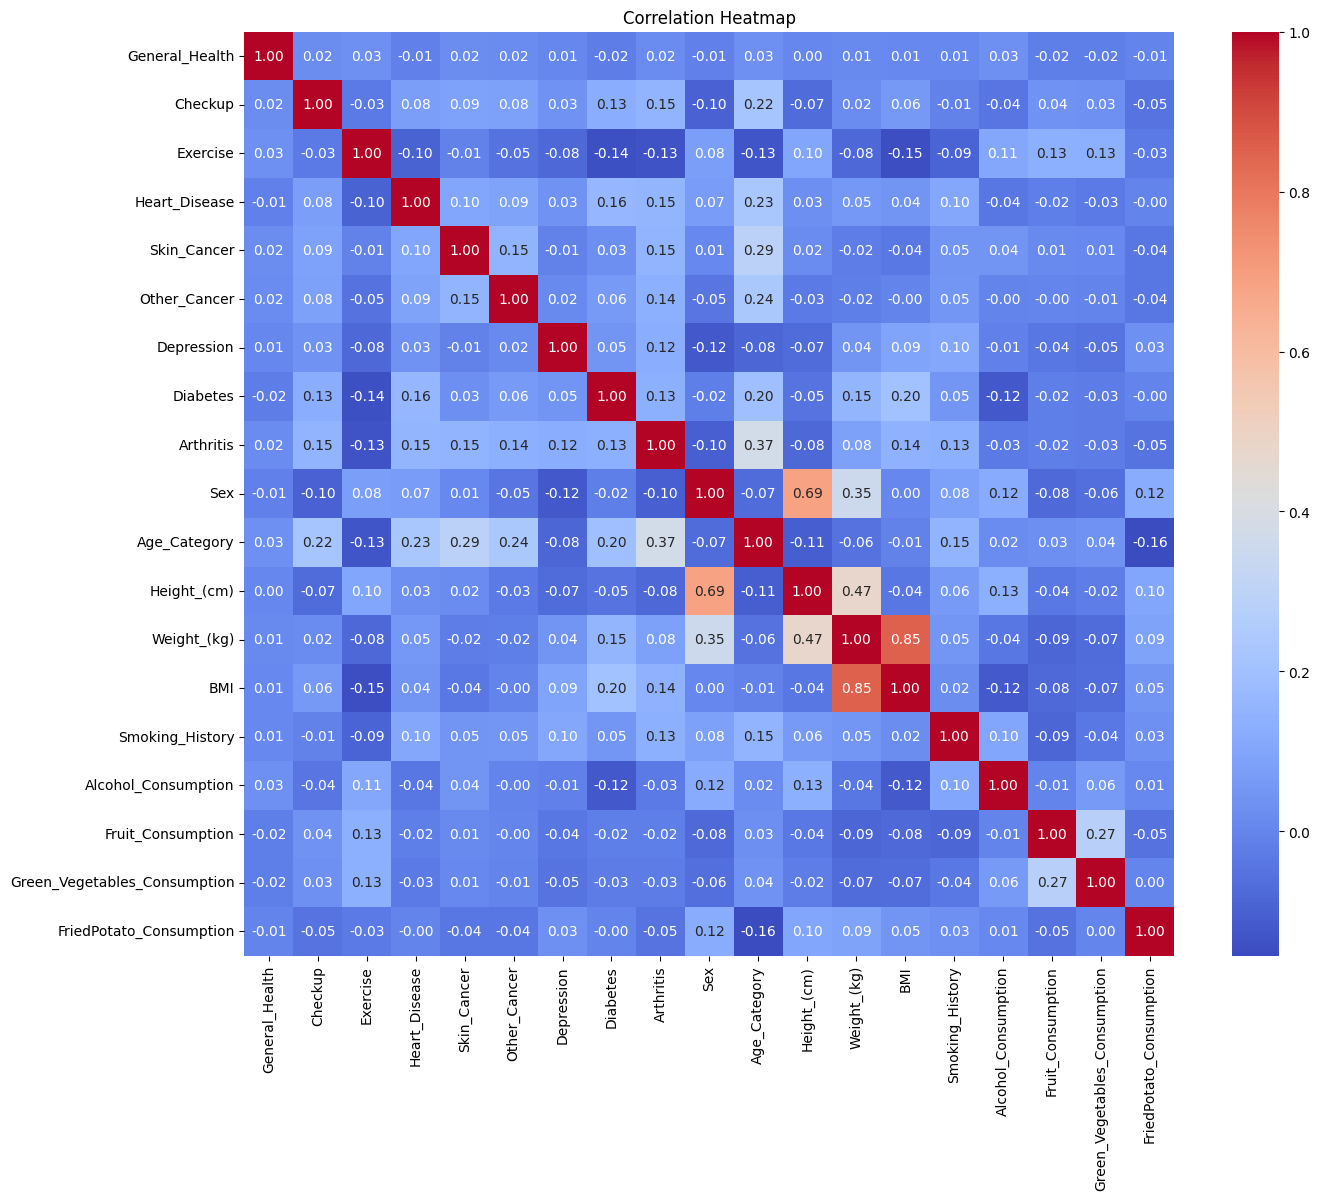

In [62]:
# Calculate the correlation matrix for Data
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

* Each square represents the correlation between two variables. The color of the squares indicates the strength of the correlation. -> Shades of red represent a positive correlation, while lighter shades of blue represent a stronger correlation.

* If there is a number in a square, this number represents the correlation coefficient between the variables involved. This value takes a value between -1 and 1. As it approaches 1, the strength of a positive correlation increases, and as it approaches -1, the strength of a negative correlation increases.
 
* Squares along the diagonal indicate the correlation of the same variables with themselves, which is equal to 1 and is usually marked with 1.

In [63]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,170.302580,81.888519,28.154736,5.311120,30.486840,16.017800,5.949200
std,10.764121,20.651591,6.361491,8.380039,25.326719,15.628798,8.480237
min,91.000000,25.400000,12.160000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,23.780000,0.000000,12.000000,4.000000,1.000000
50%,170.000000,79.380000,27.120000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,92.990000,31.190000,7.000000,30.000000,24.000000,8.000000
max,234.000000,272.160000,98.440000,30.000000,120.000000,120.000000,120.000000


# DATA VİSUALİZATİON

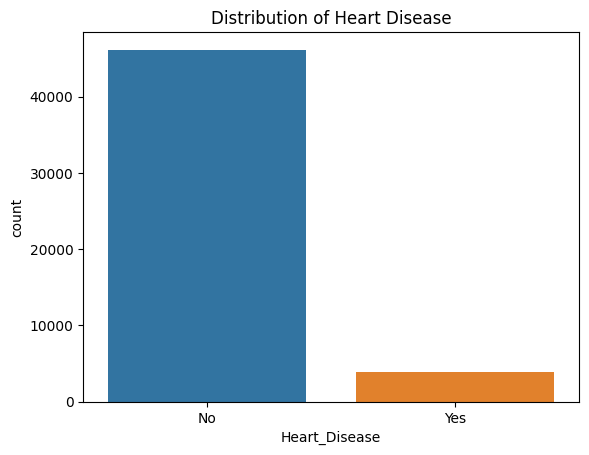

In [64]:
# Distribution of the target variable
sns.countplot(data=df, x='Heart_Disease')
plt.title('Distribution of Heart Disease')
plt.show()

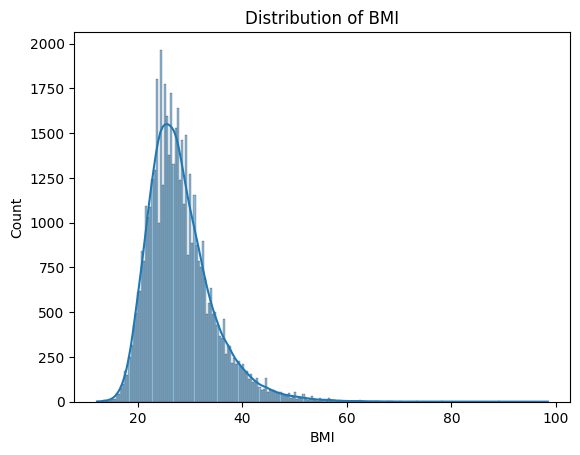

In [65]:
# Distribution of BMI
sns.histplot(data=df, x='BMI', kde=True)
plt.title('Distribution of BMI')
plt.show()

# CHECK FOR CLASS IMBALANCE AND SAMPLING

In [66]:
#CHECK THE CLASS VARIABLE
df_encoded['Heart_Disease'].value_counts()

Heart_Disease
0    46168
1     3832
Name: count, dtype: int64

In [67]:
X = df_encoded.drop("Heart_Disease", axis = 1)
y = df_encoded['Heart_Disease']

In [68]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [69]:
# Step 1: Define features and target variable
X = df_encoded.drop("Heart_Disease", axis=1)  # Features (all columns except 'Heart_Disease')
y = df_encoded["Heart_Disease"]  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# REMOVE OUTLIERS WITH IQR

In [70]:
# Define the columns to remove outliers
selected_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                    'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# SetTING a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# CreatING a mask for outliers in the selected columns
outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

# Remove rows with outliers from X_train and y_train
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

# Print the number of rows removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")

Number of rows removed due to outliers: 31012


# Supervised Learning

# Logistic Regression

Logistic Regression Accuracy: 0.72
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      9233
           1       0.73      0.69      0.71      9235

    accuracy                           0.72     18468
   macro avg       0.72      0.72      0.72     18468
weighted avg       0.72      0.72      0.72     18468



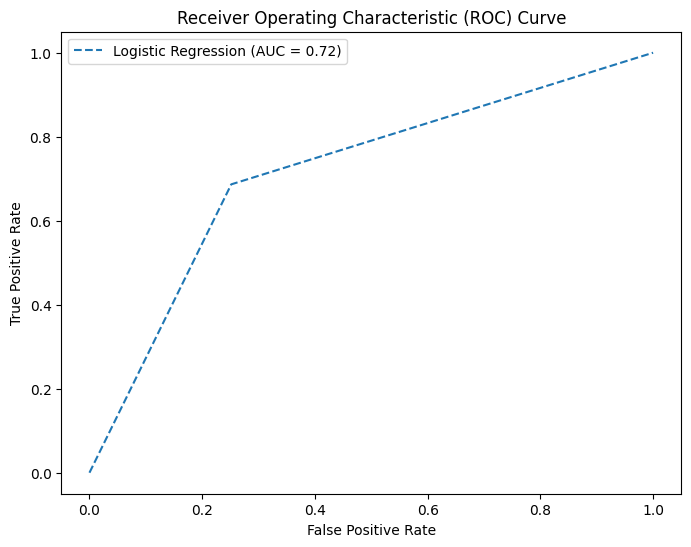

In [71]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % logistic_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [72]:
lasso_model = Lasso(alpha=0.01)
ridge_model = Ridge(alpha=0.01)
lasso_model.fit(X_train_clean, y_train_clean)
ridge_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
lasso_predictions = lasso_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)

In [73]:
# Evaluate the models' performance
mse_lasso = mean_squared_error(y_test, lasso_predictions)
mae_lasso = mean_absolute_error(y_test, lasso_predictions)
mse_ridge = mean_squared_error(y_test, ridge_predictions)
mae_ridge = mean_absolute_error(y_test, ridge_predictions)

In [74]:
print("Lasso Regression:")
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"Mean Absolute Error: {mae_lasso:.2f}")

print("\nRidge Regression:")
print(f"Mean Squared Error: {mse_ridge:.2f}")
print(f"Mean Absolute Error: {mae_ridge:.2f}")

Lasso Regression:
Mean Squared Error: 0.18
Mean Absolute Error: 0.37

Ridge Regression:
Mean Squared Error: 0.17
Mean Absolute Error: 0.35


# Decision Tree Classifier

Decision Tree Classifier Accuracy: 0.80
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      9233
           1       0.79      0.81      0.80      9235

    accuracy                           0.80     18468
   macro avg       0.80      0.80      0.80     18468
weighted avg       0.80      0.80      0.80     18468



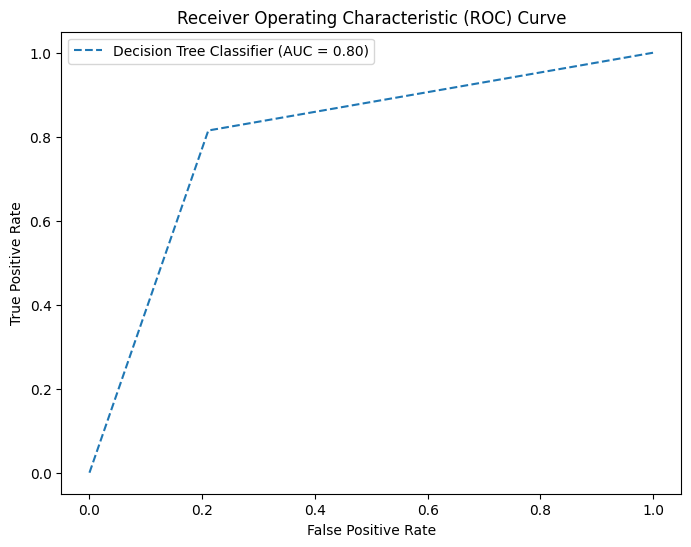

In [75]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Calculate AUC
dt_auc = roc_auc_score(y_test, dt_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, dt_predictions))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Decision Tree Classifier (AUC = %0.2f)' % dt_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

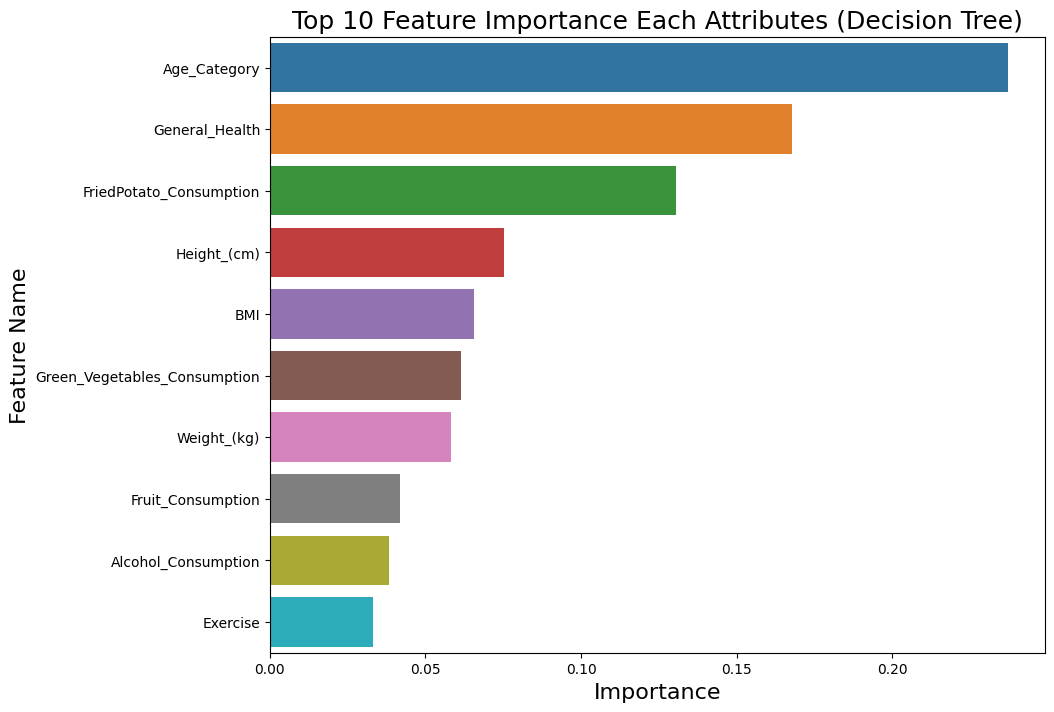

In [76]:
imp_df = pd.DataFrame({
    "Feature Name": X_train_clean.columns,
    "Importance": dt_model.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Random Forest Classifier

Random Forest Classifier Accuracy: 0.89
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      9233
           1       0.93      0.85      0.89      9235

    accuracy                           0.89     18468
   macro avg       0.89      0.89      0.89     18468
weighted avg       0.89      0.89      0.89     18468



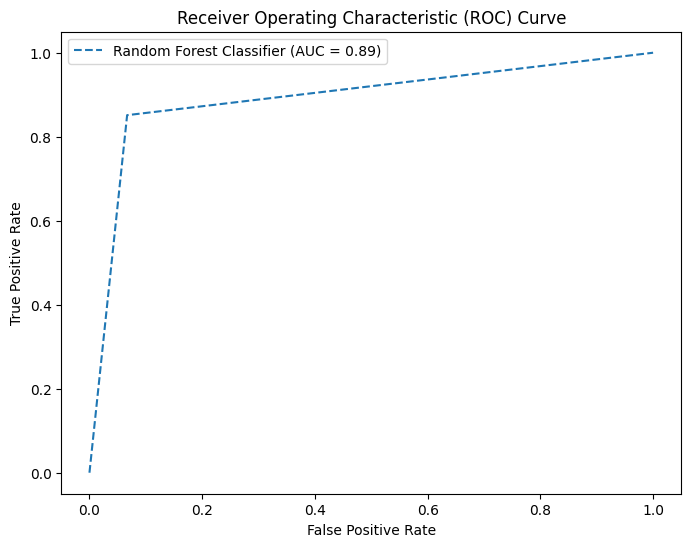

In [77]:
# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate AUC
rf_auc = roc_auc_score(y_test, rf_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_predictions))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

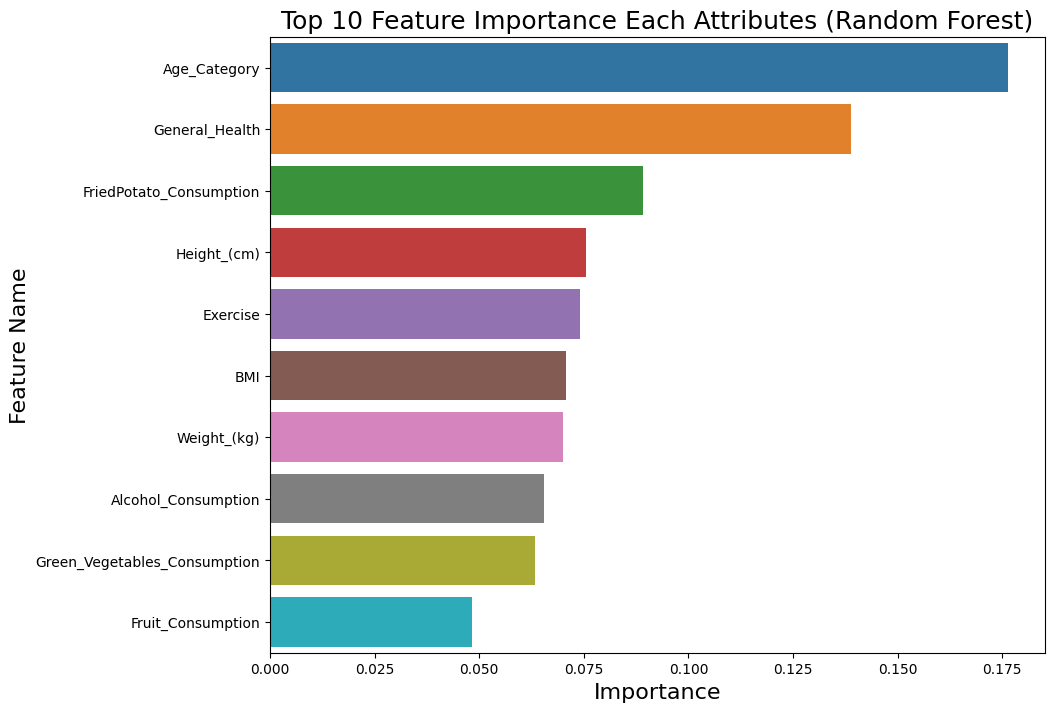

In [78]:
imp_df = pd.DataFrame({
    "Feature Name": X_train_clean.columns,
    "Importance": rf_model.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Plot the AUC comparision

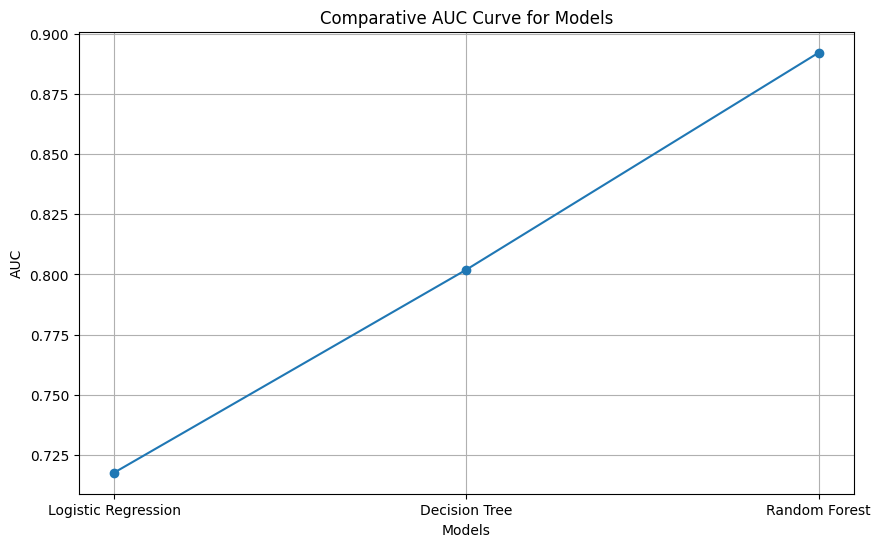

In [79]:
import matplotlib.pyplot as plt

# AUC values for each model
auc_values = [logistic_auc, dt_auc, rf_auc]

# Model names
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]  

# Plot the AUC values
plt.figure(figsize=(10, 6))
plt.plot(model_names, auc_values, marker='o', linestyle='-')
plt.title('Comparative AUC Curve for Models')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

# Unsupervised Learning

# K-Means Clustering Algorithm

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D  # 3D görselleştirme için

In [81]:
# Step 1: Digitizing categorical data (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

In [82]:
# Step 2: Scaling data (standardizing data using StandardScaler)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [83]:
# Step 3: Applying the K-Means algorithm (We choose 3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(df_scaled)

In [84]:
# Let's add the clusters to the original data set
df['Cluster'] = kmeans_clusters

In [85]:
# Step 4: Calculating performance scores of clusters

# Inertia Score of Clusters (Lower inertia means better clusters)
inertia_score = kmeans.inertia_
print(f'Inertia Skoru: {inertia_score}')

# Silhouette Score of clusters (value closer to 1 indicates better clusters)
silhouette_avg = silhouette_score(df_scaled, kmeans_clusters)
print(f'Silhouette Skoru: {silhouette_avg}')

Inertia Skoru: 1736519.0901181821
Silhouette Skoru: 0.061865241676943114


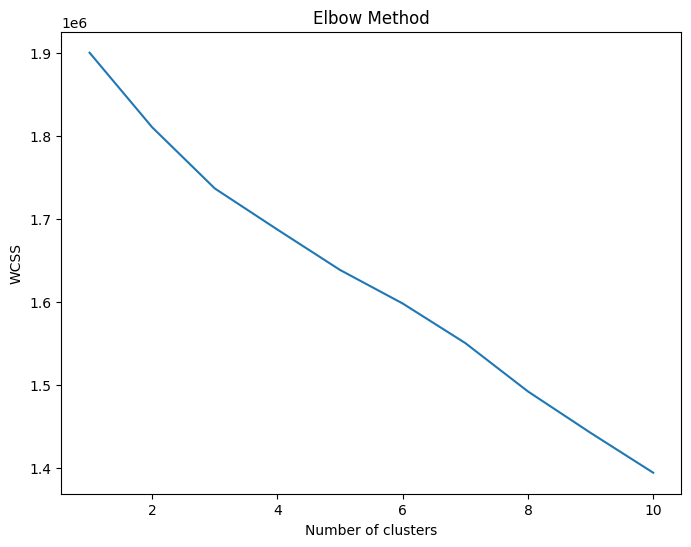

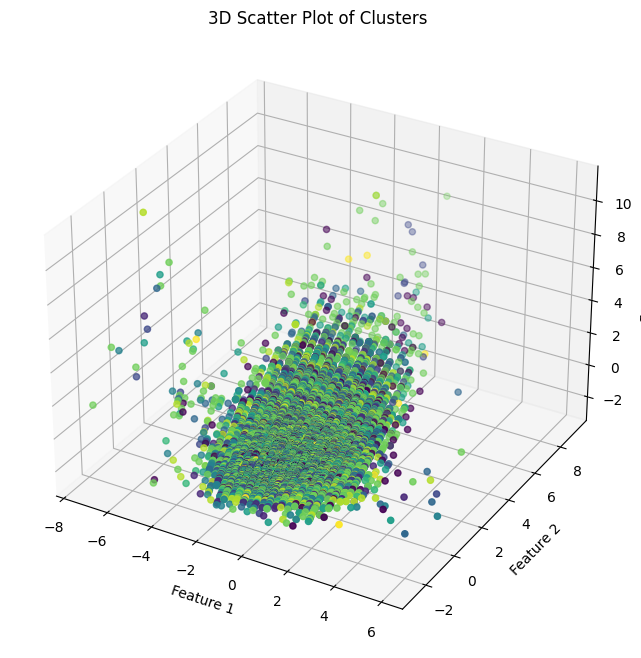

In [86]:
# Step 5 Visualizing clusters (A simple visualization with only numeric variables)

# Elbow Method graph (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 3D Scatter Plot of Clusters
# df_scaled is a numpy array so we use slicing instead of iloc
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.scatter(df_scaled[:, 0], df_scaled[:, 1], df_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatter Plot of Clusters')
plt.show()